# What is the best day/month to release movies vs popularity/domestic gross?


In [2]:
# Importing the important libraries that we shall use in this investigation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import matplotlib
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'black', 'xtick.color': 'black',
               'ytick.color': 'black'})

In [3]:
#Getting the group_data csv file 
rel_movies = pd.read_csv("Data/group_data.csv")


In [4]:
#Converting release_date to datetime 
rel_movies['release_date'] = pd.to_datetime(rel_movies['release_date'])

In [5]:
#Making seperate dataframe and dropping irrelevant columns based on question
day_of_week = rel_movies.drop(columns= ['id','genres', 'tconst', 'runtime', 'movie', 'release_date', 'release_month', 'domestic_gross', 'production_budget', 'year_released'])

In [6]:
#grouping by release day and getting the sum of respective 5 columns for plotting
day_of_week_sum = day_of_week.groupby(day_of_week['release_day'])[['popularity','domestic_gross_in_mill','production_budget_in_mill','domestic_net_in_mill','Return_on_Investment']].sum()

In [7]:
#resetting index to use release_day column to plot
day_of_week_sum = day_of_week_sum.reset_index()

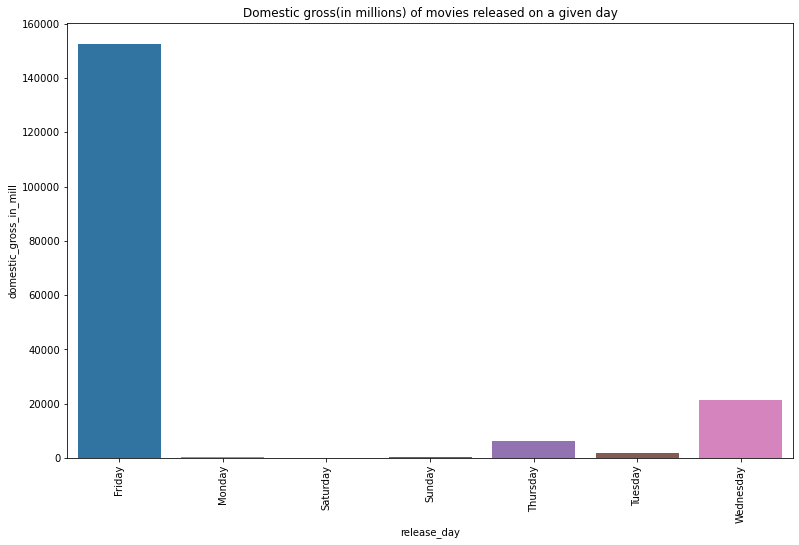

In [8]:
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='release_day', y='domestic_gross_in_mill', data=day_of_week_sum)
plt.xticks(rotation=90)
ax.set(title='Domestic gross(in millions) of movies released on a given day')
plt.show()

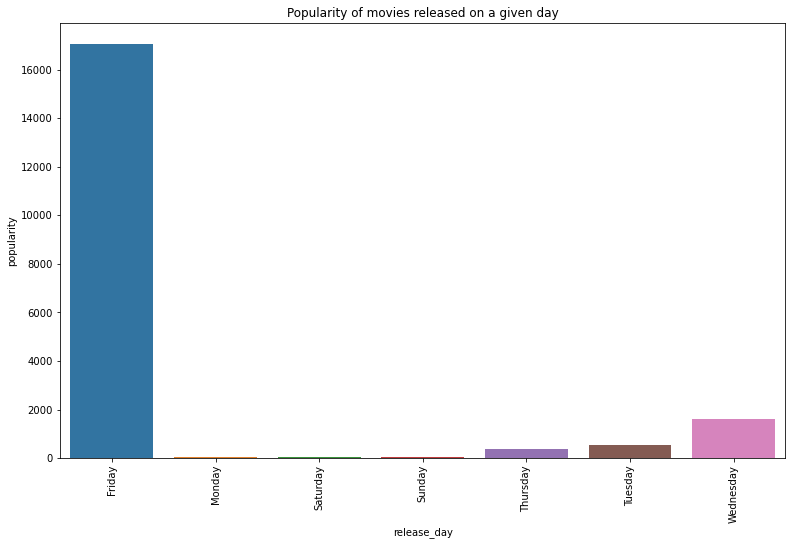

In [9]:
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='release_day', y='popularity', data=day_of_week_sum)
plt.xticks(rotation=90)
ax.set(title='Popularity of movies released on a given day')
plt.show()

In [10]:
#Making seperate dataframe and dropping irrelevant columns based on question
month_of_year = rel_movies.drop(columns= ['id','genres', 'tconst', 'runtime', 'movie', 'release_date', 'release_day', 'domestic_gross', 'production_budget', 'year_released'])

In [11]:
#grouping by release day and getting the sum of respective 5 columns for plotting
month_of_year_sum = day_of_week.groupby(month_of_year['release_month'])[['popularity','domestic_gross_in_mill','production_budget_in_mill','domestic_net_in_mill','Return_on_Investment']].sum()

In [12]:
#resetting index to use release_day column to plot
month_of_year_sum = month_of_year_sum.reset_index()

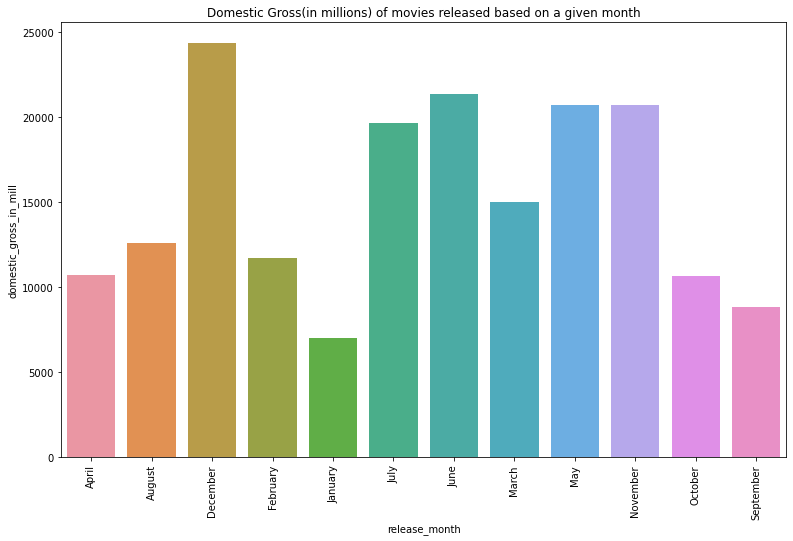

In [13]:
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='release_month', y='domestic_gross_in_mill', data=month_of_year_sum)
plt.xticks(rotation=90)
ax.set(title='Domestic Gross(in millions) of movies released based on a given month')
plt.show()

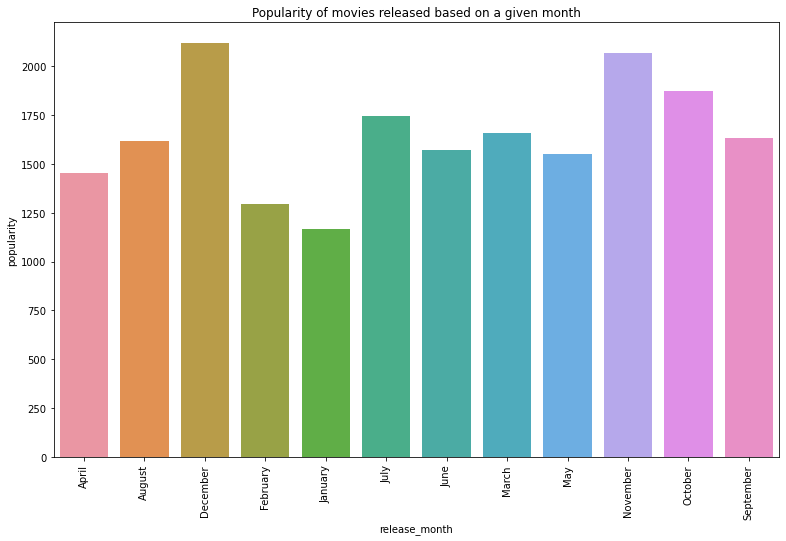

In [14]:
plt.figure(figsize=(13, 8))
ax = sns.barplot(x='release_month', y='popularity', data=month_of_year_sum)
plt.xticks(rotation=90)
ax.set(title='Popularity of movies released based on a given month')
plt.show()

In [15]:
#Examining overall aggregates of release day and release month
day_of_week_agg = day_of_week.groupby(day_of_week['release_day'])[['domestic_gross_in_mill','production_budget_in_mill','domestic_net_in_mill','Return_on_Investment']].agg(['min','max','mean','count'])
month_of_year_agg = month_of_year.groupby(month_of_year['release_month'])[['domestic_gross_in_mill','production_budget_in_mill','domestic_net_in_mill','Return_on_Investment']].agg(['min','max','mean','count'])
display(day_of_week_agg)
display(month_of_year_agg)

domestic_gross_in_mill                               \
                               min         max       mean count   
release_day                                                       
Friday                         0.0  936.662225  42.733703  3572   
Monday                         0.0  319.246193  14.128475    37   
Saturday                       0.0   56.441711   5.728433    30   
Sunday                         0.0  169.607287  17.673286    22   
Thursday                       0.0  380.270577  59.514939   103   
Tuesday                        0.0  262.030663   8.256912   230   
Wednesday                      0.0  441.226247  55.307530   389   

            production_budget_in_mill                          \
                                  min    max       mean count   
release_day                                                     
Friday                         0.0011  425.0  35.069301  3572   
Monday                         0.0070  151.0  19.334297    37   
Saturday                       0.0400  112.0  10.667333    30   
Sunday                         0.5000   70.0  22.081818    22   
Thursday                       0.0100  300.0  45.567214   103   
Tuesday                        0.0014  275.0  13.641446   230   
Wednesday                      0.0050  260.0  41.324730   389   

            domestic_net_in_mill                               \
                             min         max       mean count   
release_day                                                     
Friday               -307.237650  630.662225   7.664402  3572   
Monday                -77.600000  168.246193  -5.205823    37   
Saturday              -69.220739   41.441711  -4.938900    30   
Sunday                -54.621445  144.607287  -4.408532    22   
Thursday              -84.289790  292.126372  13.947726   103   
Tuesday              -185.697885   83.809770  -5.384534   230   
Wednesday            -136.637525  371.226247  13.982800   389   

            Return_on_Investment                                 
                             min           max       mean count  
release_day                                                      
Friday                    -100.0  23881.957778  91.728725  3572  
Monday                    -100.0    128.264882 -77.824800    37  
Saturday                  -100.0    276.278073 -75.178940    30  
Sunday                    -100.0   1371.486182  16.332779    22  
Thursday                  -100.0    503.666159 -16.504277   103  
Tuesday                   -100.0    209.069184 -85.011860   230  
Wednesday                 -100.0   6197.238000  94.753770   389

domestic_gross_in_mill                               \
                                 min         max       mean count   
release_month                                                       
April                            0.0  678.815482  29.135752   368   
August                           0.0  333.172112  34.014052   370   
December                         0.0  936.662225  43.575567   559   
February                         0.0  700.059566  37.726403   310   
January                          0.0  146.336178  26.804042   261   
July                             0.0  533.720947  61.169065   321   
June                             0.0  652.270625  64.476879   331   
March                            0.0  504.014165  40.059618   375   
May                              0.0  623.279547  68.838529   301   
November                         0.0  424.668047  58.852060   352   
October                          0.0  274.092705  24.486043   436   
September                        0.0  327.481748  22.063447   399   

              production_budget_in_mill                          \
                                    min    max       mean count   
release_month                                                     
April                            0.0100  300.0  25.672342   368   
August                           0.0011  180.0  28.248429   370   
December                         0.0070  425.0  35.338732   559   
February                         0.0400  200.0  30.489258   310   
January                          0.0090  140.0  23.443203   261   
July                             0.0050  275.0  46.879713   321   
June                             0.0150  350.0  48.571690   331   
March                            0.0100  275.0  34.440630   375   
May                              0.0070  330.6  53.279519   301   
November                         0.0173  300.0  48.464271   352   
October                          0.0070  185.0  21.074397   436   
September                        0.0014  156.0  22.920105   399   

              domestic_net_in_mill                               \
                               min         max       mean count   
release_month                                                     
April                   -98.287549  378.815482   3.463409   368   
August                  -95.588898  163.172112   5.765623   370   
December               -136.637525  630.662225   8.236836   559   
February               -131.517481  500.059566   7.237145   310   
January                 -99.688566  133.141585   3.360839   261   
July                   -185.697885  348.720947  14.289352   321   
June                   -307.237650  437.270625  15.905189   331   
March                  -201.941321  344.014165   5.618988   375   
May                    -154.766600  398.279547  15.559010   301   
November               -120.702809  294.668047  10.387789   352   
October                -114.911680  179.288866   3.411646   436   
September               -94.566473  292.481748  -0.856658   399   

              Return_on_Investment                                  
                               min           max        mean count  
release_month                                                       
April                       -100.0   4728.764160   54.713017   368  
August                      -100.0  16358.272727  111.083605   370  
December                    -100.0   1949.932357   -1.362780   559  
February                    -100.0   3420.813300   60.109582   310  
January                     -100.0   5226.294500   74.464186   261  
July                        -100.0  22664.410000  145.481525   321  
June                        -100.0  11035.239000   99.400893   331  
March                       -100.0   6637.800000   76.104857   375  
May                         -100.0  17637.489231  120.435637   301  
November                    -100.0   2472.987000   40.094664   352  
October                     -100.0   5968.000000   80.398188   436  


# Conclusion
**Friday** is the best day to release a movie, in terms of both popularity and also domestic gross.                        **December** is the best month to release a movie,  in terms of both popularity and domestic gross.

# Insight

Try to release movies on a **Friday** so that more people will come and watch the movie which will drive up ticket sales as compared to other days.
We have found out that **December** by far is the most popular and profitable month for movies to be released as compared to other months. So try to release movies in the **October to December** range of months.